<a href="https://colab.research.google.com/github/shivas24/EDA-Exploratory-Data-Analysis-/blob/main/EDA_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life Cycle of Machine Learning project



1.   Understand problem
2.   Data collection
3.   Data check
4.  exploratory data analysis(EDA)
5.  Data Pre Processing
6.  Model training
7.  Select best Model








1.   Understand the Problem

        student performance is affected by other variable ssuch as gender, ethincity, parent education qualification, lunch, test preparation course

2. Data collection
Source of data set: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [75]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint


In [76]:
# Import csv data s pandas dataframe

df=pd.read_csv('./sample_data/StudentsPerformance.csv')

In [77]:
#Show top 5 records

df.head() #or df.head(5)



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
# shape dataset

df.shape

(1000, 8)

#Data set information


*   gender  (male /female)
*   race/ethinicity
*   parents education qualification
*   lunch- Having lunch before test
*   test preppaaration( empty stomach/ low food)
*   math score
*   reading score
*   writing score




# Data Checks to Perform

*   Check Misssing values
*   Check duplicates
*   Check datatype
*   Check  the number of unique values of each column
*   Check Statistics in dataset
*   Check various categories in categoricalcolumn




In [79]:
# Check Missing Values

df.isna().sum()    # Zero Means Nomissing values in dataset

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [80]:
# Check duplicates  # 0 means no duplicates

df.duplicated().sum()

np.int64(0)

In [81]:
# CheckData Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [82]:
# Check no . of unique values in each column

df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [83]:
# Check statistics of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1.   **General Info**
    * Above explains the number of observation si for 1000 students

2.   **Central tendency**

    * **Mean** is the average of all 1000, indictaes that  students scrore nearly higher than the maths as comapred to reading , writing skills
    *   **Median** is the min to max i.e. from 0 to 100, if we observe median @ 50% is very close to mean thats roughly its symmetric distribution

3. **Spread(Variability)**
    *   standard deviation (std)  is similar variablitiy across all variables
    *   Interquartile Range(IQR) is 75%-25% i.e for maths is 77-57=20, writing is 79-57.75=21.25  , reading is 79-59=20  indicates consistent spread in middle of 50% scores

4.  **Range**
    
    *   The range for maths is 0 to 100, reading score 17 to 100, writing score is 10 to 100..    which indicates that maths is widest range from 0 to100 means some outliers are visible means non attempts

5.  **Distribution shape (Skewness )**

    *   @ 50 % mean,median, iqr are symmetrically distributed means its normal distribution. But if we observe min values are starting from 0 in maths it is left skewed  . left skewed measn towards 0 right skewed means towards 1

# Insights

*   students performing well in reading, writing as compared to maths
*   The distribution is relatively balanced almost in all subjects, but occassionally low inmaths and in writing
*   performance seems consistent overall but few outlers



# Exploring Data

In [84]:
# Categories

print( 'categories in gender is ::',df['gender'].unique())
print("Categories in race/ethnicity is::", df['race/ethnicity'].unique())
print("Categories in ParentalLevel  of education is ::", df['parental level of education'].unique())
print("Categories in lunch is ::", df['lunch'].unique())
print("Categories in test preparation course is ::", df['test preparation course'].unique())

categories in gender is :: ['female' 'male']
Categories in race/ethnicity is:: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in ParentalLevel  of education is :: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch is :: ['standard' 'free/reduced']
Categories in test preparation course is :: ['none' 'completed']


In [85]:
# define humerical and categorical columns

numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

# print features

print("We have {} numerical features. which are {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features. which are {}".format(len(categorical_features),categorical_features))


We have 3 numerical features. which are ['math score', 'reading score', 'writing score']
We have 5 categorical features. which are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [86]:
# Adding columns "total_score" and "average"

df['total_score']= df['math score'] + df['reading score'] + df['writing score']
df['average']= df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [87]:
# Calculate those got maximum score of 100

math_score_max=df[df['math score'] ==100]['average'].count()
reading_score_max=df[df['reading score'] ==100]['average'].count()
writing_score_max=df[df['writing score'] ==100]['average'].count()

print(f'No. of student with full marks in maths score::,{math_score_max}')
print(f'No. of student with full marks in reading score::,{reading_score_max}')
print(f'No. of student with full marks in writing score::,{writing_score_max}')

# or also we can write i different way

full_score_maths= df['math score'] ==100
full_score_reading= df['reading score'] == 100
full_score_writing= df['writing score'] == 100

print(f'\nTotal no of students got full marks in math score:::,{full_score_maths.sum()}')
print(f'Total no of students got full marks in reading score:::,{full_score_reading.sum()}')
print(f'Total no of students got full marks in writing score:::,{full_score_writing.sum()}')


No. of student with full marks in maths score::,7
No. of student with full marks in reading score::,17
No. of student with full marks in writing score::,14

Total no of students got full marks in math score:::,7
Total no of students got full marks in reading score:::,17
Total no of students got full marks in writing score:::,14


In [88]:
# Calculate those got score of <=20

math_score_min=df[df['math score'] <=20]['average'].count()
reading_score_min=df[df['reading score'] <=20]['average'].count()
writing_score_min=df[df['writing score'] <=20]['average'].count()



print(f'No. of student with <=20 marks in maths score::,{math_score_min}')
print(f'No. of student with <=20 marks in reading score::,{reading_score_min}')
print(f'No. of student with <=20 marks in writing score::,{writing_score_min}')


# or also we can write i different way

min_score_maths= df['math score'] <=20
min_score_reading= df['reading score'] <= 20
min_score_writing= df['writing score'] <= 20



print(f'\nTotal no of students <=20 marks in math score:::,{min_score_maths.sum()}')
print(f'Total no of students <=20 marks in reading score:::,{min_score_reading.sum()}')
print(f'Total no of students <=20 marks in writing score:::,{min_score_writing.sum()}')


No. of student with <=20 marks in maths score::,4
No. of student with <=20 marks in reading score::,1
No. of student with <=20 marks in writing score::,3

Total no of students <=20 marks in math score:::,4
Total no of students <=20 marks in reading score:::,1
Total no of students <=20 marks in writing score:::,3


#   Insights:

*   students performed worst in Maths, and well performed in reading

#Exploring Data (Data Visualization)

*   Histogram
*   Kernel distribution Function(KDE)   


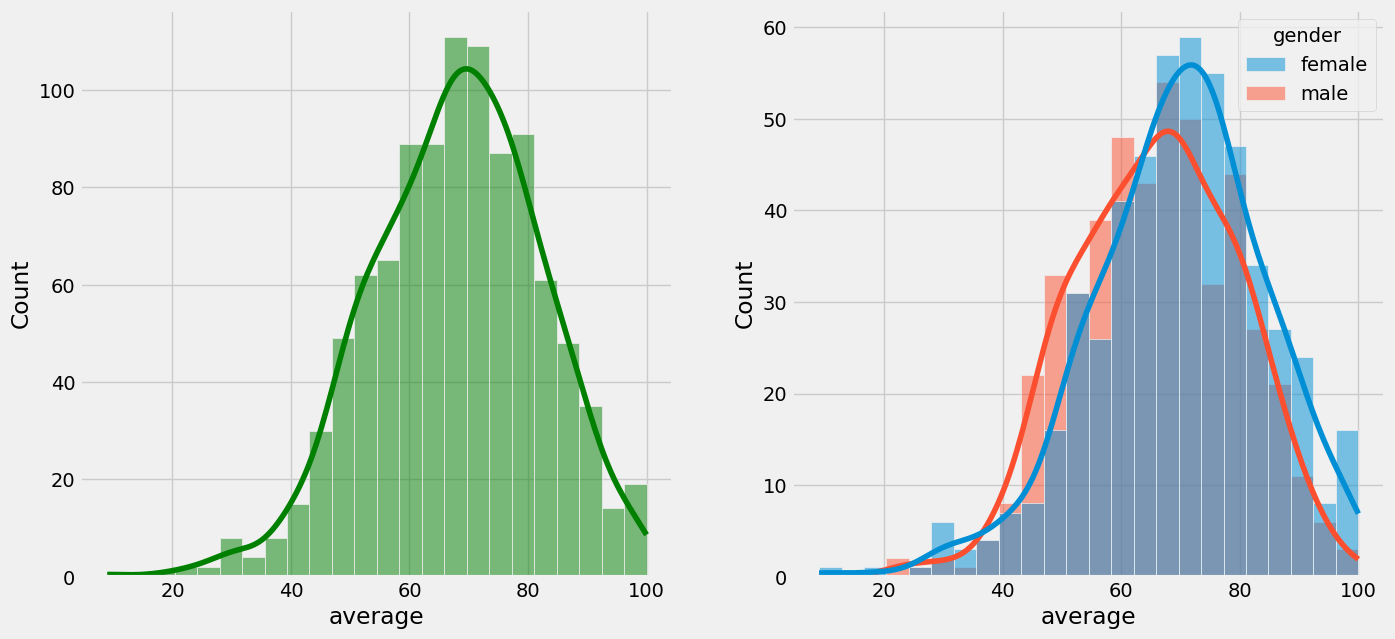


**Insights:::Female students  performed well**


In [89]:
# Histogram & KDE

fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='g', ax=axs[0])
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender', ax=axs[1])
plt.show()
print()
print("**Insights:::Female students  performed well**")


#Insights::  Female students perform well

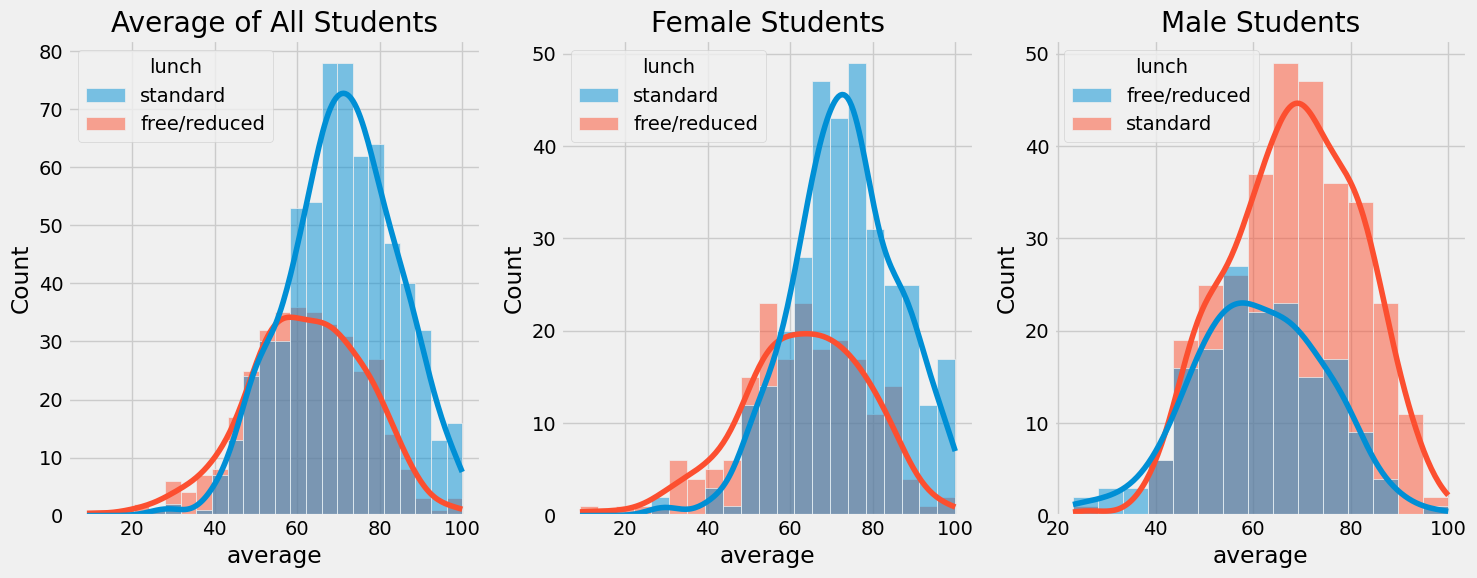

INSIGHTS:::
Standard Lunch heps perform well exams
standard lunch students have higher average both male and female


In [90]:
# Lunch estimation

plt.subplots(1,3,figsize=(15,6))


plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('Average of All Students')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Male Students')

plt.tight_layout()
plt.show()

print("INSIGHTS:::")
print("Standard Lunch heps perform well exams")
print('standard lunch students have higher average both male and female')

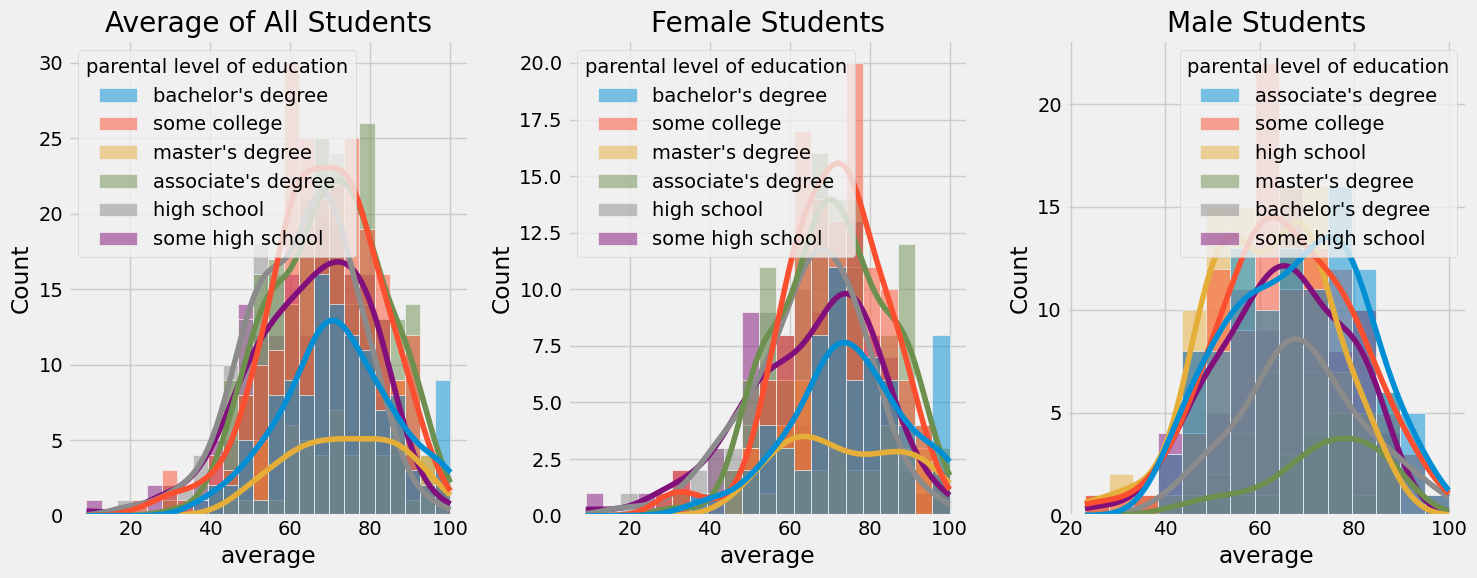

INSIGHTS:::
On average education no effect on female to perform well exams 1st & 2nd grpah are same
well educated parents helpd the male child to perform well


In [91]:
# Parent education Level estimation

plt.subplots(1,3,figsize=(15,6))


plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.title('Average of All Students')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental level of education')
plt.title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.title('Male Students')

plt.tight_layout()
plt.show()

print("INSIGHTS:::")
print("On average education no effect on female to perform well exams 1st & 2nd grpah are same")
print('well educated parents helpd the male child to perform well')

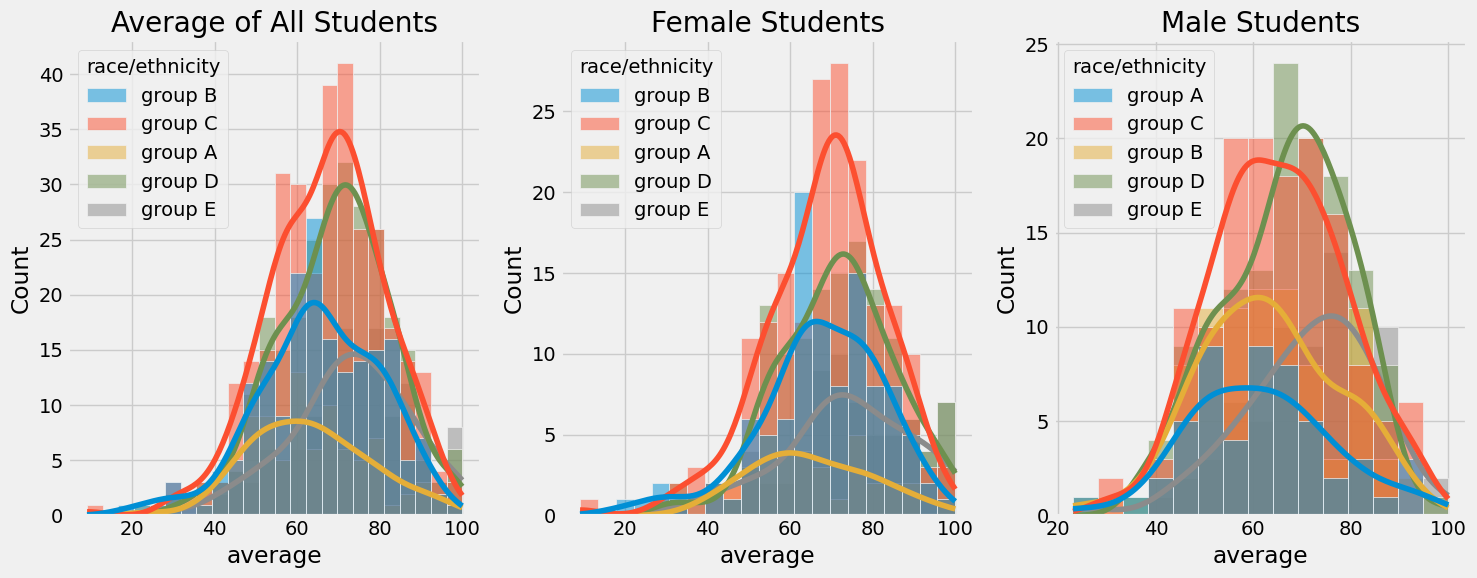

INSIGHTS:::
Group A performed very poorly in exams irresoective of race
Group C performed very well


In [92]:
# Race / ethnicity

plt.subplots(1,3,figsize=(15,6))


plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.title('Average of All Students')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race/ethnicity')
plt.title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.title('Male Students')

plt.tight_layout()
plt.show()

print("INSIGHTS:::")
print("Group A performed very poorly in exams irresoective of race")
print('Group C performed very well')

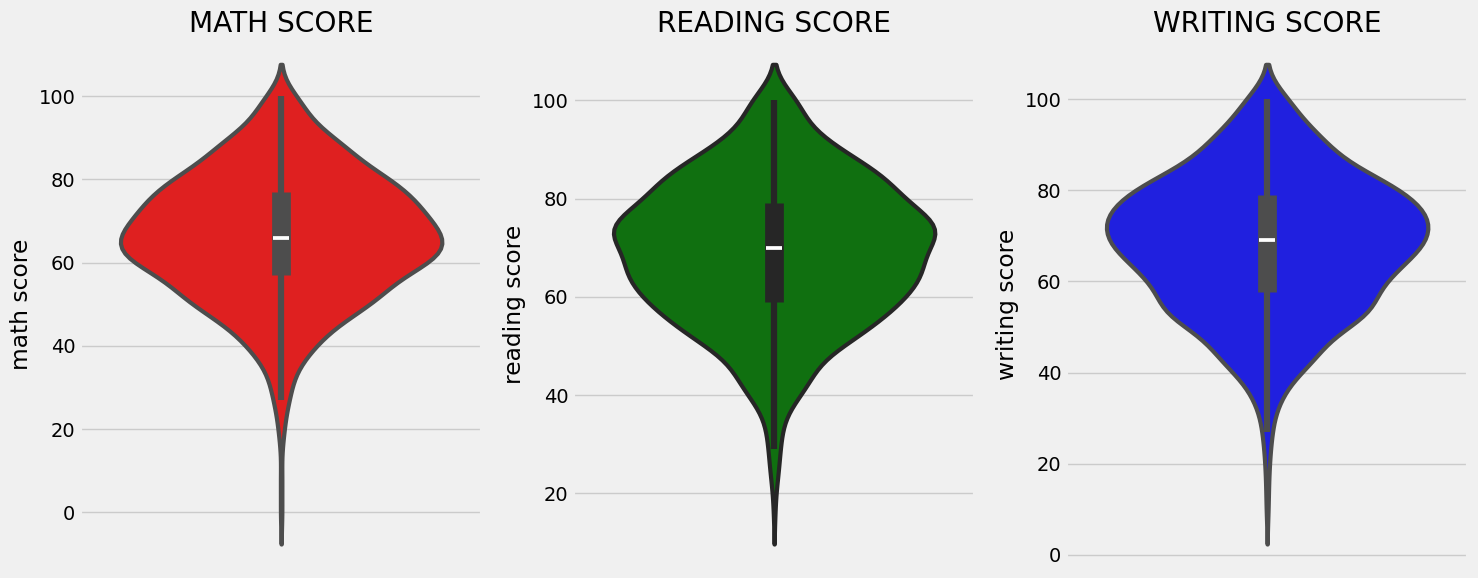

In [93]:
#Maximum score

plt.subplots(1,3,figsize=(15,6))

plt.subplot(131)
plt.title('MATH SCORE')
sns.violinplot(data=df,y='math score', color='red',linewidth=3)

plt.subplot(132)
plt.title('READING SCORE')
sns.violinplot(data=df,y='reading score', color='green',linewidth=3)

plt.subplot(133)
plt.title('WRITING SCORE')
sns.violinplot(data=df,y='writing score', color='blue',linewidth=3)

plt.tight_layout()
plt.show()


['1. Number of male and female students is almost equal',
 '2. Group C has the highest number of students or highest scores',
 '3. Standard lunch is preferable among students',
 '4. Male students prepared very well for the test',
 '5. Most of the parents have graduation-level education']



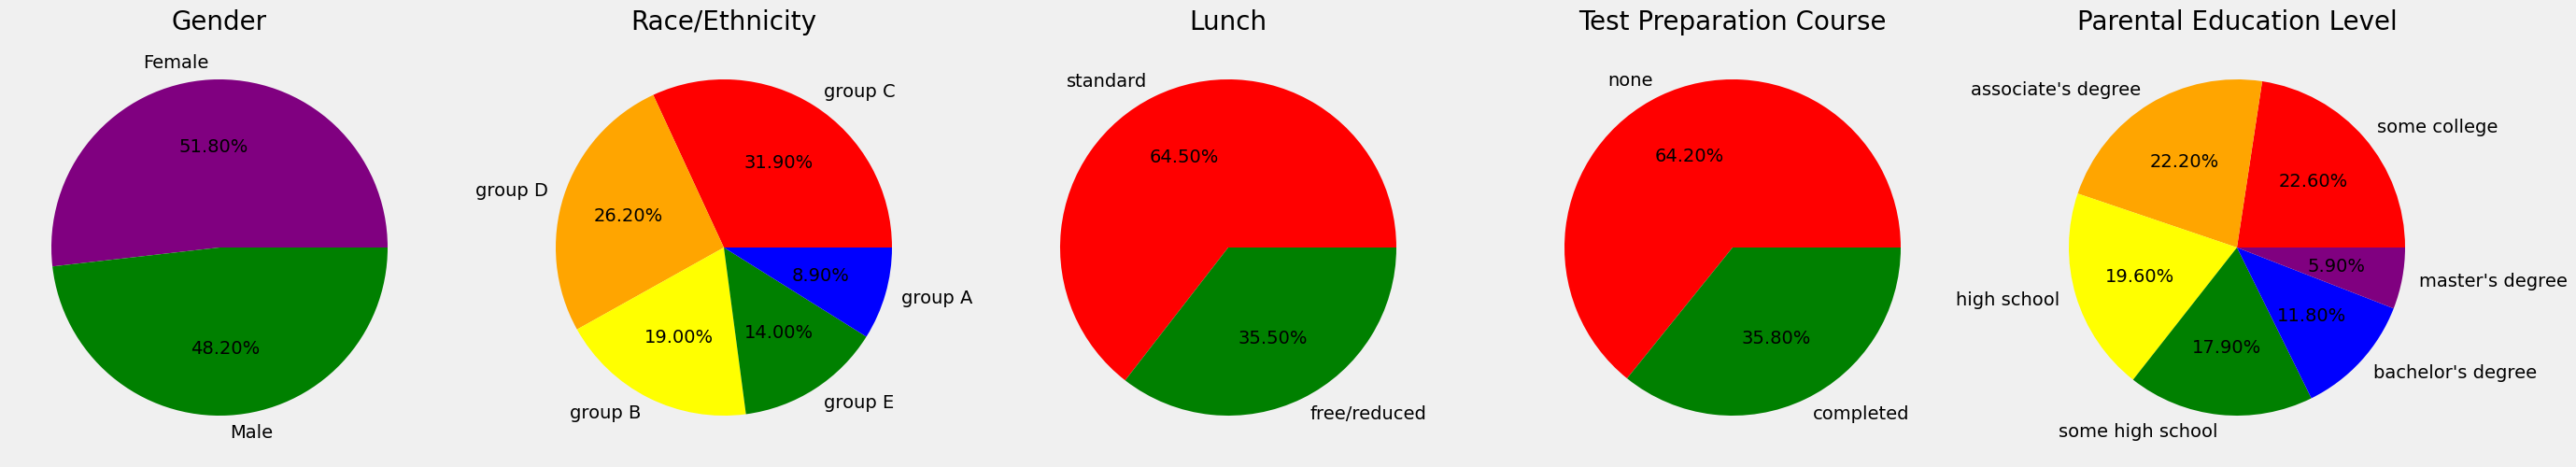

In [94]:
#Univariant Analysis using pie plot

plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
colors=['purple','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels=df['race/ethnicity'].value_counts().index
colors=['red','orange','yellow','green','blue']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')



plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels=df['lunch'].value_counts().index
colors=['red','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels=df['test preparation course'].value_counts().index
colors=['red','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)

size=df['parental level of education'].value_counts()
labels=df['parental level of education'].value_counts().index
colors=['red','orange','yellow','green','blue','purple']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f%%')
plt.title('Parental Education Level',fontsize=20)
plt.axis('off')


insights=[
    "1. Number of male and female students is almost equal",
    "2. Group C has the highest number of students or highest scores",
    "3. Standard lunch is preferable among students",
    "4. Male students prepared very well for the test",
    "5. Most of the parents have graduation-level education"
]
print()
pprint(insights)
print()


#Feature Visualization

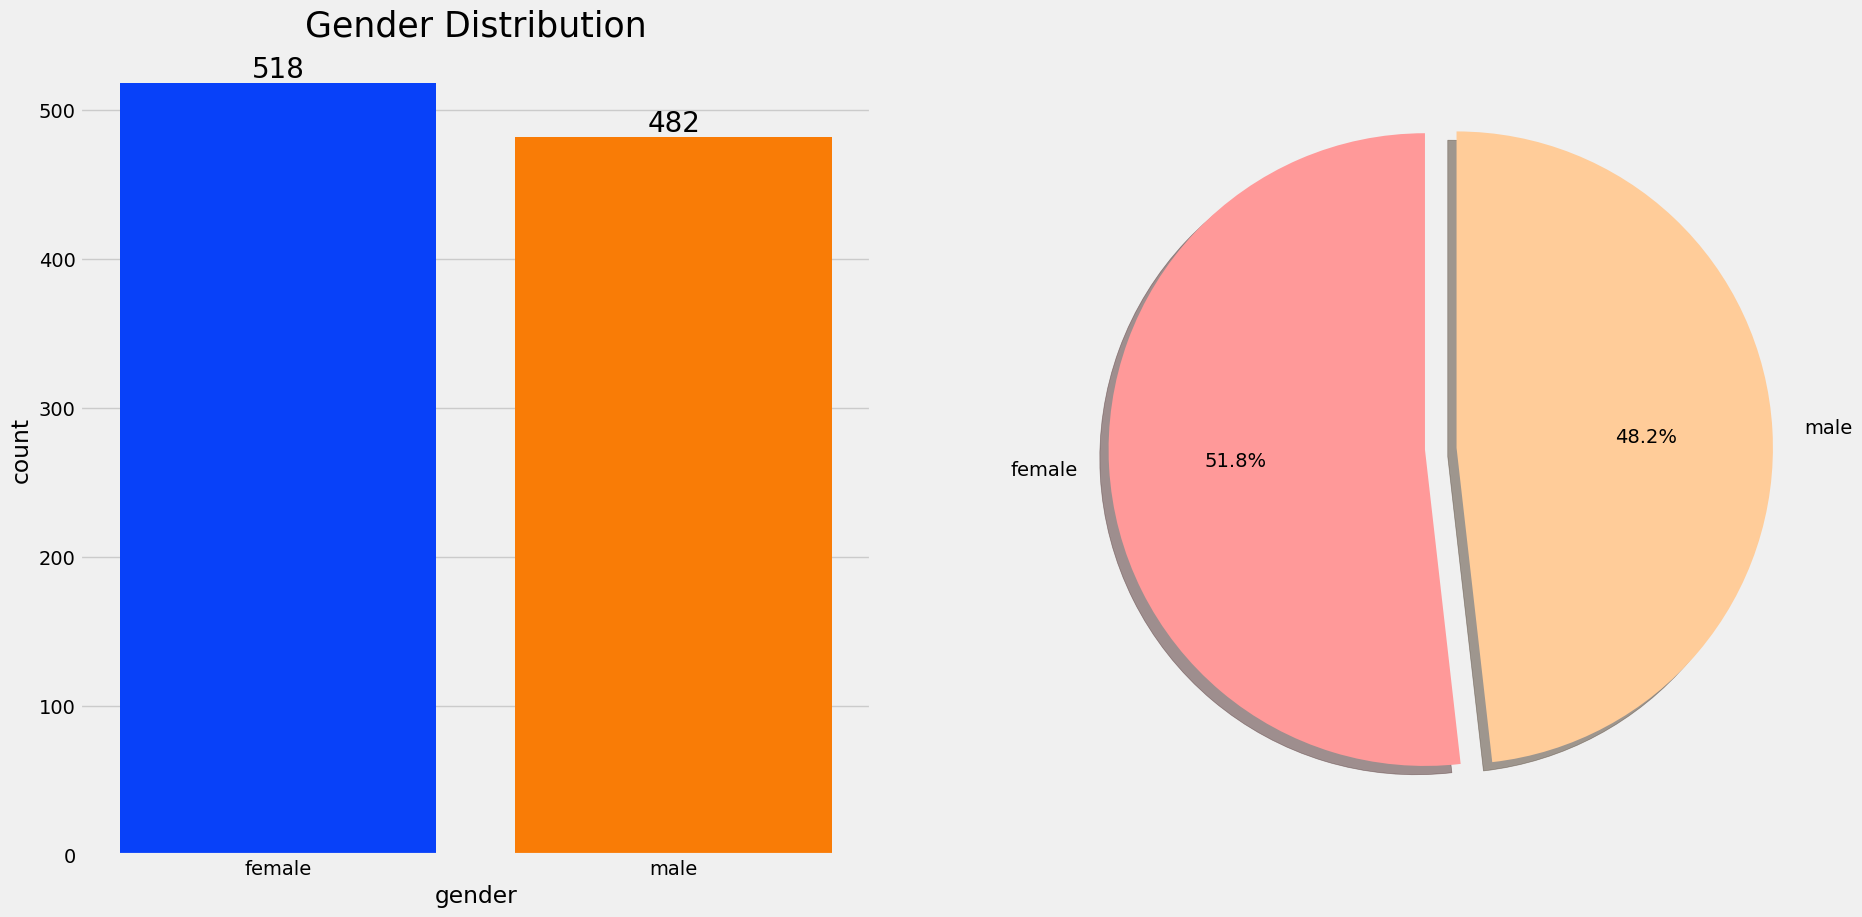

['Gender has almost equal data ']


In [95]:
#Feature Visualization

# Gender column

#1. How is the distribution of Gender
#2. Is gender has any impact on student performance

#1. How is the distribution of Gender
# Univariant Analysis(Gender distribution)

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%', shadow=True,colors=['#ff9999','#ffcc99'],startangle=90)
ax[0].set_title('Gender Distribution',fontdict={'fontsize':25})
plt.show()

insights=['Gender has almost equal data ']
pprint(insights)

In [96]:
# Bivariant Analysis
#2. Is gender has any impact on student performance

gender_group = df.groupby('gender').mean(True)
print(gender_group)

        math score  reading score  writing score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


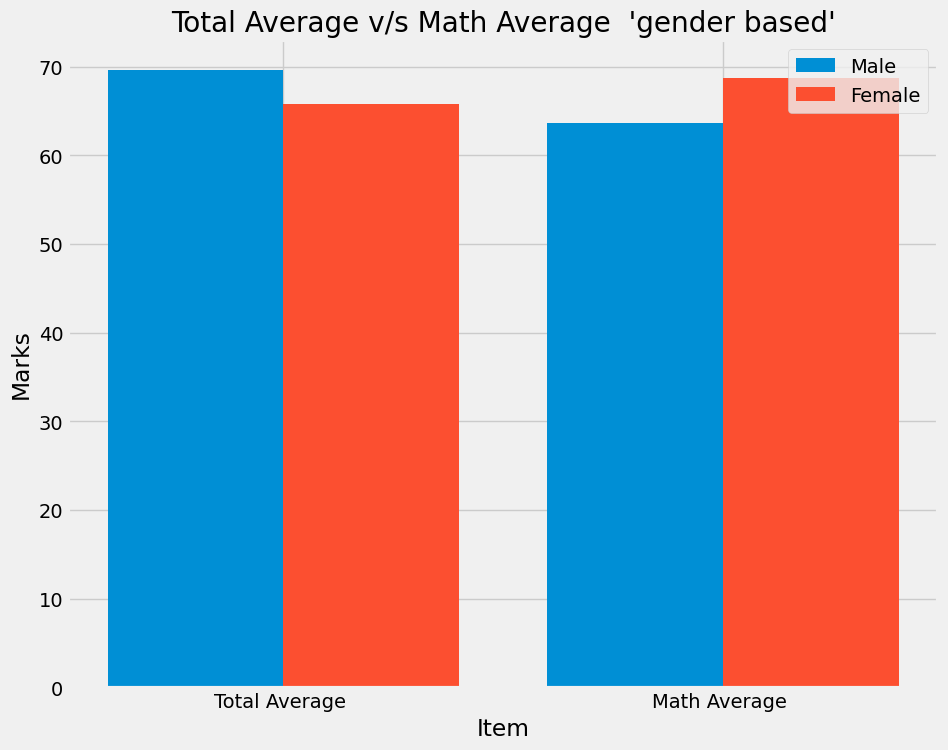

['Overall female have better average than male',
 'in Maths male had good performance']


In [97]:
#Total Average v/s math Average  'gender based'
# Bivariant

plt.figure(figsize=(10,8))

x=['Total Average ','Math Average ']

male_score=[gender_group['average'][0],gender_group['math score'][0]]
female_score=[gender_group['average'][1],gender_group['math score'][1]]

x_axis=np.arange(len(x))

plt.bar(x_axis-0.2,male_score,0.4,label='Male')
plt.bar(x_axis+0.2,female_score,0.4,label='Female')

plt.xticks(x_axis,x)
plt.xlabel("Item")
plt.ylabel("Marks")
plt.title("Total Average v/s Math Average  'gender based'")
plt.legend()
plt.show()


insights=['Overall female have better average than male', 'in Maths male had good performance']
pprint(insights)
#

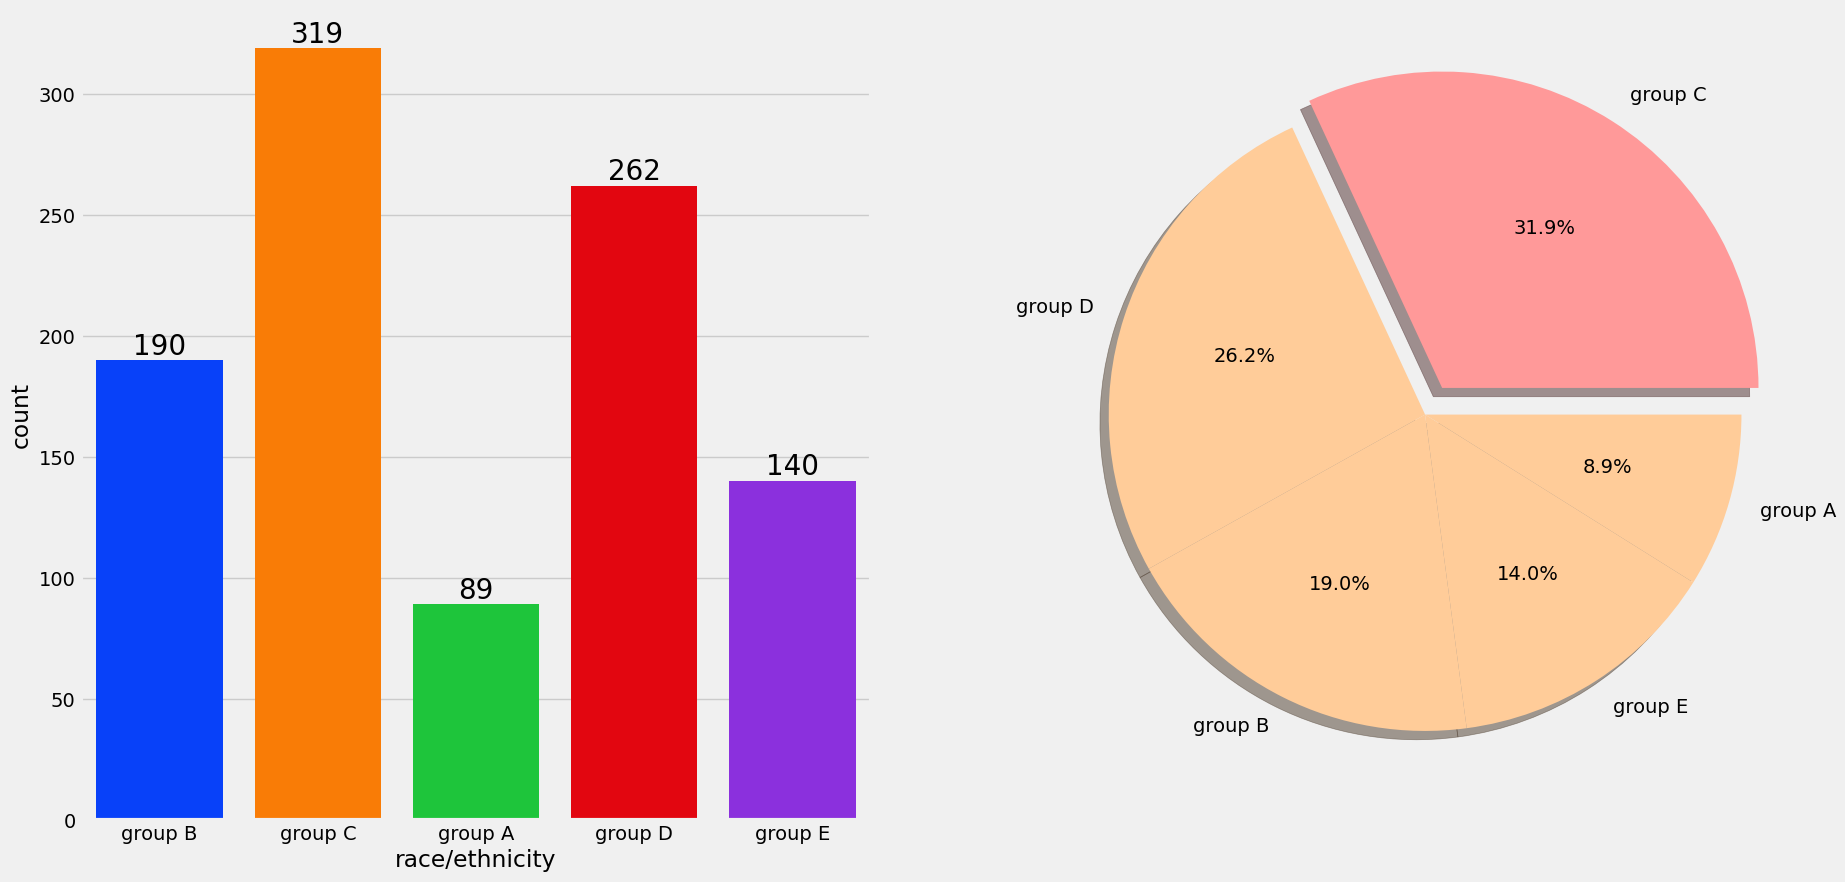

INSIGHTS OBSERVED:::

['Most of the students belongs to  Group C & Group D',
 'Group A has the lowest number of students']


In [98]:
#RACE/ETHNICITY

#1. How is groupwise distribution
#2. student performance impacted by race/ethnicity


#UNIVARIANT ANALYSIS
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True,colors=['#ff9999','#ffcc99','#ffcc99','#ffcc99','#ffcc99'])
plt.show()

insight=['Most of the students belongs to  Group C & Group D','Group A has the lowest number of students']
print("INSIGHTS OBSERVED:::\n")
pprint(insight)

                math score  reading score  writing score  total_score  \
race/ethnicity                                                          
group A          61.629213      64.674157      62.674157   188.977528   
group B          63.452632      67.352632      65.600000   196.405263   
group C          64.463950      69.103448      67.827586   201.394984   
group D          67.362595      70.030534      70.145038   207.538168   
group E          73.821429      73.028571      71.407143   218.257143   

                  average  
race/ethnicity             
group A         62.992509  
group B         65.468421  
group C         67.131661  
group D         69.179389  
group E         72.752381  
INSIGHTS OBSERVED:::

['Group E students have scored the highest marks',
 'Group A students have scored the lowest marks.',
 'Group D students have scored average marks']


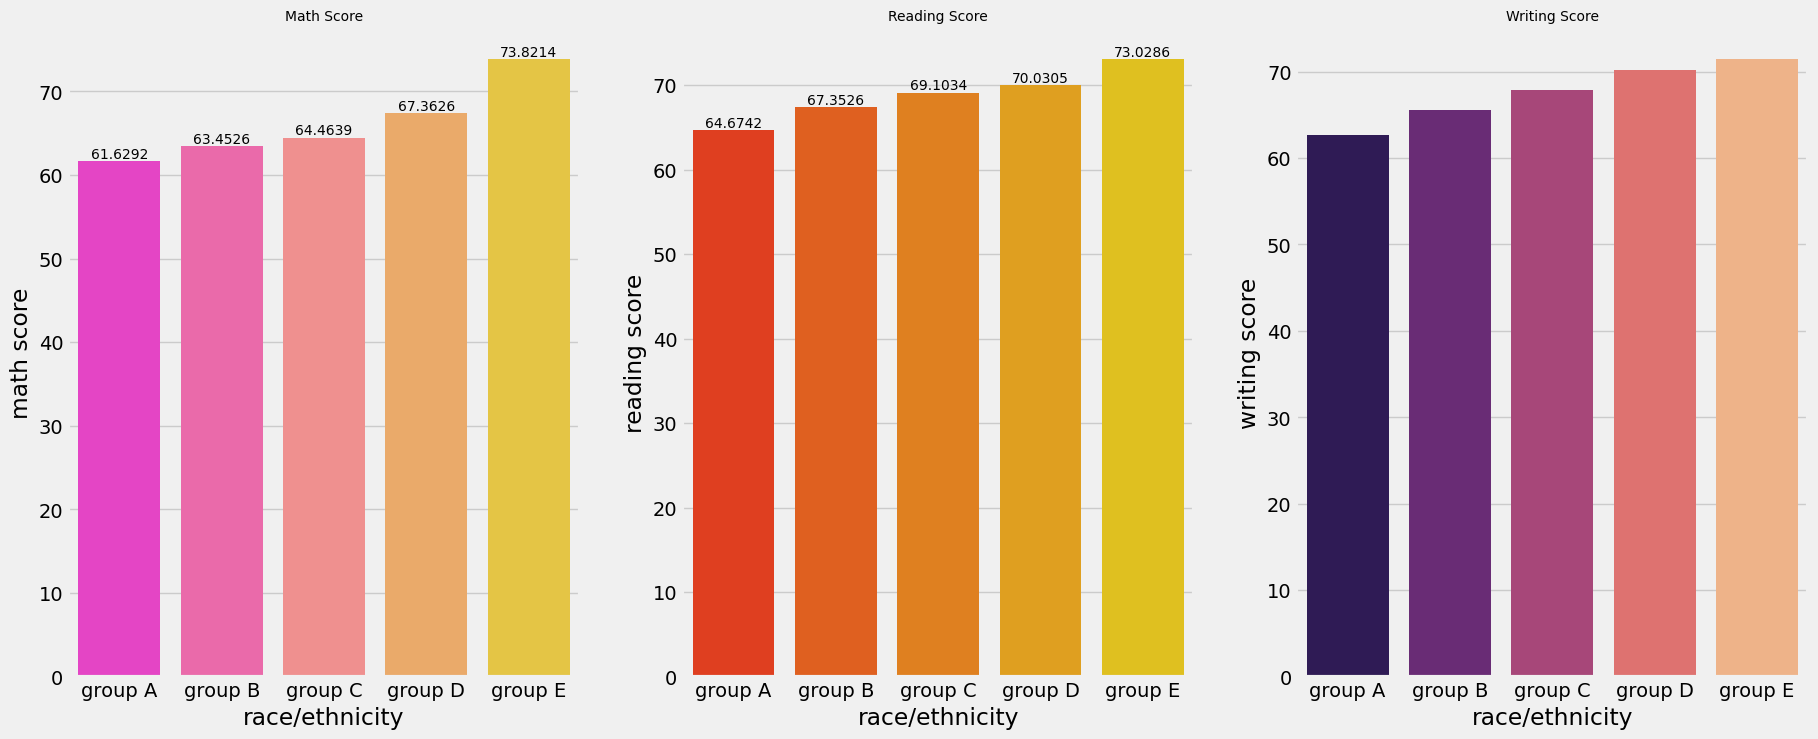

In [99]:
# Bivariant Analysis
#Race/ethnicity has any impact on student's performance

race_group2 = df.groupby('race/ethnicity').mean(True)
print(race_group2)

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group2.index,y=race_group2['math score'],palette='spring',ax=ax[0])
ax[0].set_title('Math Score',color='black',size=10)

for container in ax[0].containers:
            ax[0].bar_label(container,color='black',size=10)

sns.barplot(x=race_group2.index,y=race_group2['reading score'],palette='autumn',ax=ax[1])
ax[1].set_title("Reading Score",color='black',size=10)

for container in ax[1].containers:
            ax[1].bar_label(container,color='black',size=10)

sns.barplot(x=race_group2.index,y=race_group2['writing score'],palette='magma',ax=ax[2])
ax[2].set_title("Writing Score",color='black',size=10)

insights=['Group E students have scored the highest marks','Group A students have scored the lowest marks.','Group D students have scored average marks']
print("INSIGHTS OBSERVED:::\n")
pprint(insights)

In [100]:
# PARENTAL LEVEL OF EDUCATION COLUMN

#1. What is the educational background of a student's parents
#2. Parents education has any impact on students performance



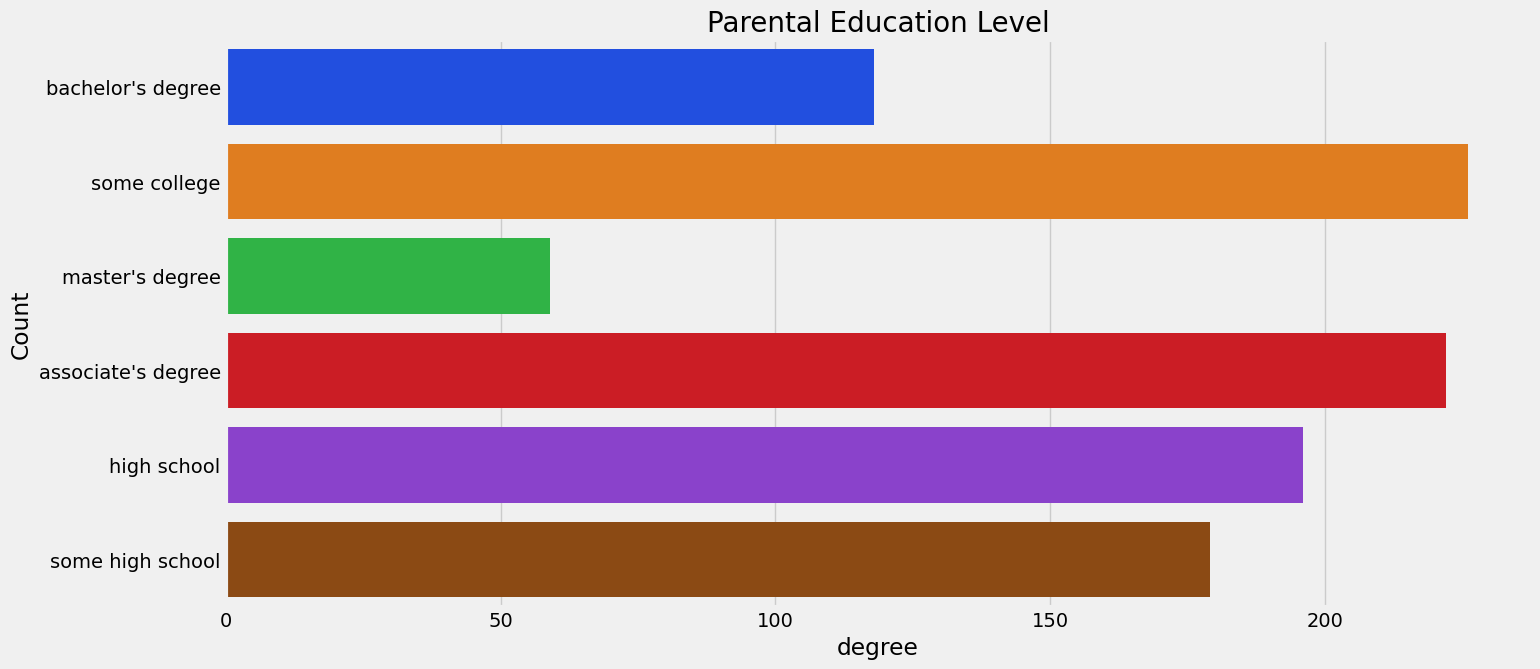

INSIGHTS OBSERVED:::

['Largest number are from some college']


In [101]:
#UNIVARIANT ANALYSIS

plt.rcParams['figure.figsize']=(15,7)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'],palette='bright')
plt.title('Parental Education Level',color='black',size=20)
plt.xlabel('degree')
plt.ylabel('Count')
plt.show()

insight=['Largest number are from some college']
print("INSIGHTS OBSERVED:::\n")
pprint(insight)

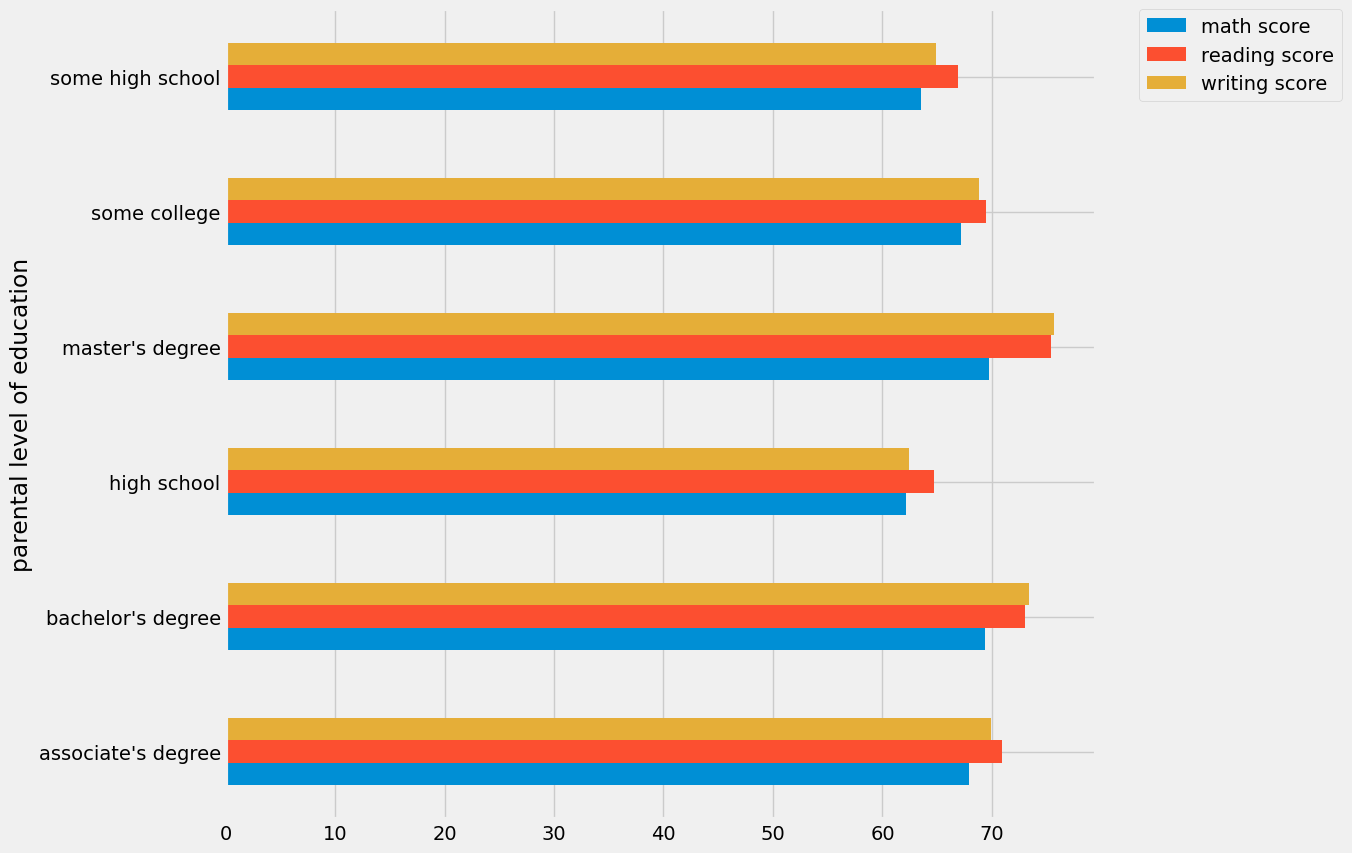

INSIGHTS OBSERVED:::

'Largest number are from Masters Degree &  Bachelor degree'


In [111]:
# Bivariant analysis
# Is parental education has any impact on students performance

df.groupby('parental level of education').agg({'math score': 'mean', 'reading score': 'mean', 'writing score': 'mean'}).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Insight
insight = ('Largest number are from Masters Degree &  Bachelor degree')
print("INSIGHTS OBSERVED:::\n")
pprint(insight)
